# STEP 1 Import Libraries

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import warnings
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
warnings.filterwarnings('ignore')

# Loand and Process Data

In [133]:
# Import data
file_path = r"C:\Users\sebas\OneDrive\Desktop\_CU-VIRT-AI-PT-03-2024-U-LOLC\ClassProject\project2\Summer.csv"
df = pd.read_csv(file_path)
# Display the first few rows of the dataframe
print(df.head(20))

    Year    City      Sport Discipline                Athlete Country Gender  \
0   1896  Athens   Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
1   1896  Athens   Aquatics   Swimming       HERSCHMANN, Otto     AUT    Men   
2   1896  Athens   Aquatics   Swimming      DRIVAS, Dimitrios     GRE    Men   
3   1896  Athens   Aquatics   Swimming     MALOKINIS, Ioannis     GRE    Men   
4   1896  Athens   Aquatics   Swimming     CHASAPIS, Spiridon     GRE    Men   
5   1896  Athens   Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
6   1896  Athens   Aquatics   Swimming          HAJOS, Alfred     HUN    Men   
7   1896  Athens   Aquatics   Swimming       ANDREOU, Joannis     GRE    Men   
8   1896  Athens   Aquatics   Swimming  CHOROPHAS, Efstathios     GRE    Men   
9   1896  Athens   Aquatics   Swimming          NEUMANN, Paul     AUT    Men   
10  1896  Athens   Aquatics   Swimming      PEPANOS, Antonios     GRE    Men   
11  1896  Athens  Athletics  Athletics  

In [134]:
#Get info on all features and target
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB
None


In [135]:
#data exploration - module 12 activities
# p_value evaluation
# Z score
# histogram
# plotting
# heatmap

In [136]:
# Drop unnecessary columns
df = df.drop(columns=['City', 'Discipline', 'Athlete', 'Event'])
df.head()

,Year,Sport,Country,Gender,Medal
0,1896,Aquatics,HUN,Men,Gold
1,1896,Aquatics,AUT,Men,Silver
2,1896,Aquatics,GRE,Men,Bronze
3,1896,Aquatics,GRE,Men,Gold
4,1896,Aquatics,GRE,Men,Silver


In [137]:
# Group by Year, Country, and Medal to get the medal count
medal_type_ct_country = df.groupby(['Year', 'Country', 'Medal']).agg(Medal_count=('Medal', 'count')).sort_values('Medal_count', ascending=False).reset_index()
medal_type_ct_country.head()

,Year,Country,Medal,Medal_count
0,1980,URS,Gold,192
1,1984,USA,Gold,168
2,1996,USA,Gold,160
3,2012,USA,Gold,147
4,1904,USA,Gold,146


# STEP3 Comperative Analysis Top 5 countries



In [168]:
# Define the top 5 countries
top_5_countries = ['USA', 'URS', 'GBR', 'FRA', 'GER']

# Initialize a dictionary to store forecasts for each country
forecasts = {}

In [171]:
# Function to prepare and forecast using Prophet
def forecast_medals(country):
    country_df = medal_ct_country.loc[medal_ct_country['Country'] == country].sort_values(by=['Year'])
    country_df.set_index('Year', inplace=True)
    
    # Prepare the data for Prophet
    prophet_df = country_df.drop('Country', axis=1).reset_index()
    prophet_df['Year'] = pd.to_datetime(prophet_df['Year'], format='%Y')
    prophet_df.columns = ['ds', 'y']
    prophet_df = prophet_df.dropna()
    
    # Create and fit the Prophet model
    m = Prophet()
    m.fit(prophet_df)
    
    # Create a future DataFrame to hold predictions
    future = m.make_future_dataframe(periods=13, freq='YS')
    forecast = m.predict(future)
    
    # Store the forecast
    forecasts[country] = forecast

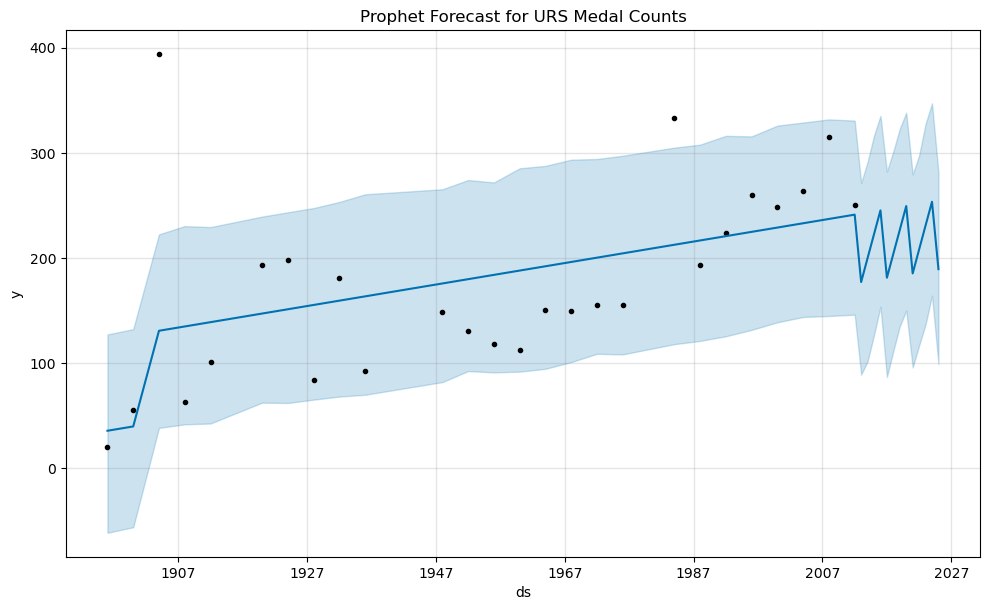

In [172]:
# Plot the forecast
m.plot(forecast)
plt.title(f'Prophet Forecast for {country} Medal Counts')
plt.show()

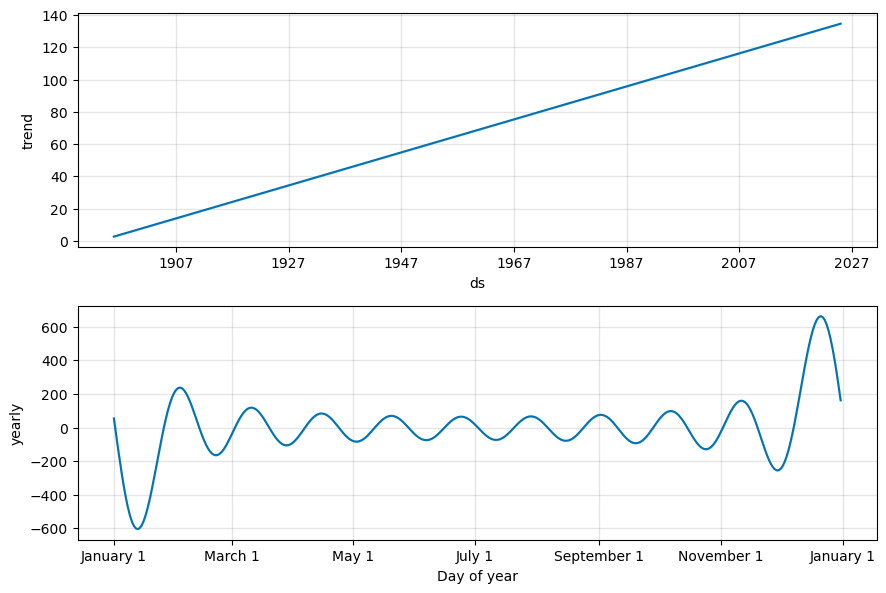

In [173]:
# Plot the individual time series components
m.plot_components(forecast)
plt.show()

In [174]:
# Perform cross-validation
df_cv = cross_validation(m, initial='7305 days', period='365 days', horizon='1460 days')
df_metrics = performance_metrics(df_cv)

  0%|          | 0/75 [00:00<?, ?it/s]

10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:38 - cmdstanpy - INFO - Chain [1] start processing
10:57:38 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1] done processing
10:57:39 - cmdstanpy - INFO - Chain [1] start processing
10:57:39 - cmdstanpy - INFO - Chain [1]

10:57:53 - cmdstanpy - INFO - Chain [1] done processing
10:57:53 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing
10:57:53 - cmdstanpy - INFO - Chain [1] start processing
10:57:53 - cmdstanpy - INFO - Chain [1] done processing


In [176]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)
    
print(f'{country} - Mean Absolute Error: {mae:.2f}')
print(f'{country} - Mean Squared Error: {mse:.2f}')
print(f'{country} - Root Mean Squared Error: {rmse:.2f}')

URS - Mean Absolute Error: 77.36
URS - Mean Squared Error: 11480.23
URS - Root Mean Squared Error: 107.15


In [177]:
# Forecast medals for each of the top 5 countries
for country in top_5_countries:
    forecast_medals(country)

10:59:28 - cmdstanpy - INFO - Chain [1] start processing
10:59:28 - cmdstanpy - INFO - Chain [1] done processing
10:59:28 - cmdstanpy - INFO - Chain [1] start processing
10:59:28 - cmdstanpy - INFO - Chain [1] done processing
10:59:28 - cmdstanpy - INFO - Chain [1] start processing
10:59:28 - cmdstanpy - INFO - Chain [1] done processing
10:59:28 - cmdstanpy - INFO - Chain [1] start processing
10:59:28 - cmdstanpy - INFO - Chain [1] done processing
10:59:29 - cmdstanpy - INFO - Chain [1] start processing
10:59:29 - cmdstanpy - INFO - Chain [1] done processing


In [182]:
# Compare the forecasts for the top 5 countries for the year 2024
predictions_2024 = {}
for country in top_5_countries:
    # Get the closest date to 2024-01-01 if it doesn't exist
    forecast_dates = forecasts[country]['ds']
    if '2024-01-01' in forecast_dates.values:
        predictions_2024[country] = forecasts[country].loc[forecasts[country]['ds'] == '2024-01-01', 'yhat'].values[0]
    else:
        closest_date = forecast_dates.iloc[(forecast_dates - pd.Timestamp('2024-01-01')).abs().argsort()[0]]
        predictions_2024[country] = forecasts[country].loc[forecasts[country]['ds'] == closest_date, 'yhat'].values[0]

In [183]:
# Convert the predictions to a DataFrame and sort by predicted medal count
predictions_df = pd.DataFrame(list(predictions_2024.items()), columns=['Country', 'Predicted_Medals_2024'])
predictions_df = predictions_df.sort_values(by='Predicted_Medals_2024', ascending=False)
print(predictions_df)

  Country  Predicted_Medals_2024
1     URS             447.220469
0     USA             253.353185
4     GER             147.527352
3     FRA              47.849489
2     GBR              28.004993


# STEP 4 .Visualize Medal Counts for the USA

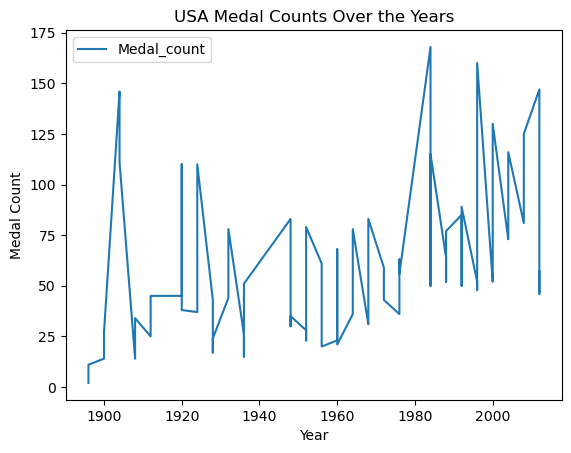

In [138]:
# Select USA and set Year as the index
usa_df = medal_type_ct_country.loc[medal_type_ct_country['Country'] == 'USA'].sort_values(by=['Year'])
usa_df.set_index('Year', inplace=True)
usa_df.plot()
plt.title('USA Medal Counts Over the Years')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.show()

In [139]:
# Get medal count by country and year
medal_ct_country = df.groupby(['Year', 'Country']).agg(Medal_count=('Medal', 'count')).sort_values('Medal_count', ascending=False).reset_index()
print(medal_ct_country.head())

   Year Country  Medal_count
0  1980     URS          442
1  1904     USA          394
2  1908     GBR          347
3  1984     USA          333
4  2008     USA          315


In [140]:
# Select USA and set year as index
usa_df = medal_ct_country.loc[medal_ct_country['Country'] == 'USA'].sort_values(by=['Year'])
usa_df.set_index('Year', inplace=True)
print(usa_df.head())

     Country  Medal_count
Year                     
1896     USA           20
1900     USA           55
1904     USA          394
1908     USA           63
1912     USA          101


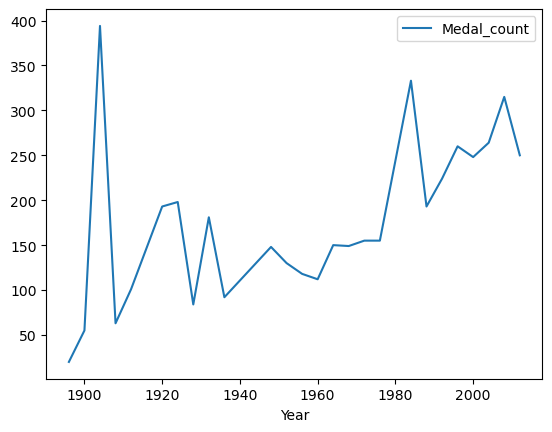

In [141]:
# Plot the medal count over the years
usa_df.plot()
plt.show()

# STEP 4. Time Series Forecasting Projections Using Prophet

In [142]:
#reset the index of the DataFrame
# Prepare the data for Prophet
prophet_df = usa_df.drop('Country', axis=1).reset_index()
prophet_df['Year'] = pd.to_datetime(prophet_df['Year'], format='%Y')
# Prepare the training data to be read into a prophet model
# Rename the columns to names that Prophet recognizes
prophet_df.columns = ['ds', 'y']
prophet_df = prophet_df.dropna()
prophet_df.head()

,ds,y
0,1896-01-01,20
1,1900-01-01,55
2,1904-01-01,394
3,1908-01-01,63
4,1912-01-01,101


In [143]:
# Create and fit the Prophet model
m = Prophet()
m.fit(prophet_df)

10:24:49 - cmdstanpy - INFO - Chain [1] start processing
10:24:49 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
# Create a future DataFrame to hold predictions
future = m.make_future_dataframe(periods=13, freq='YS')  # Use 'YS' instead of 'Y'
forecast = m.predict(future)
# Review the first and last 10 rows of the DataFrame
display(future.head(10))
display(future.tail(15))

,ds
0,1896-01-01
1,1900-01-01
2,1904-01-01
3,1908-01-01
4,1912-01-01
5,1920-01-01
6,1924-01-01
7,1928-01-01
8,1932-01-01
9,1936-01-01


,ds
24,2008-01-01
25,2012-01-01
26,2013-01-01
27,2014-01-01
28,2015-01-01
29,2016-01-01
30,2017-01-01
31,2018-01-01
32,2019-01-01
33,2020-01-01


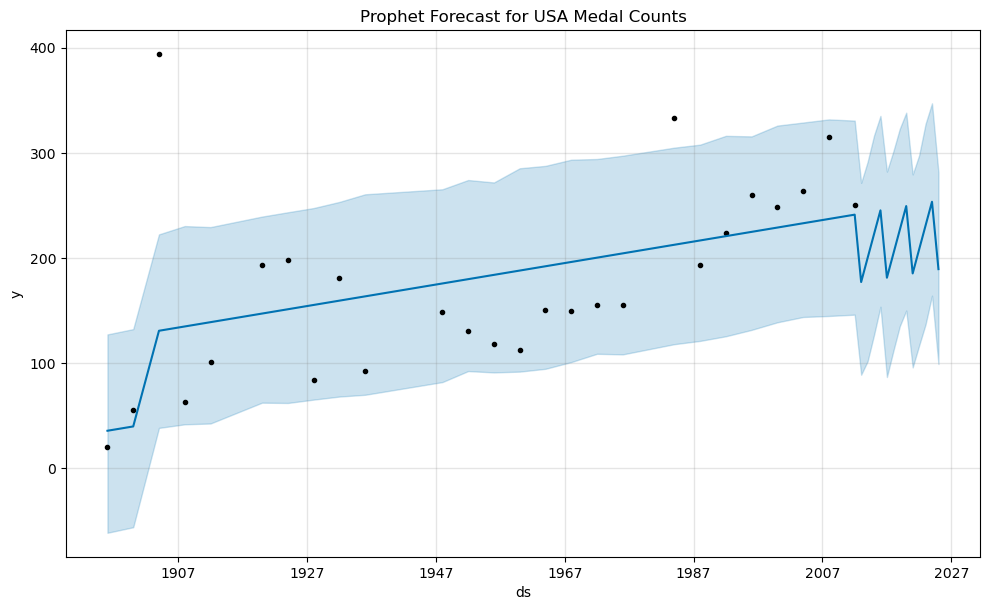

In [145]:
# Plot the forecast
m.plot(forecast)
plt.title('Prophet Forecast for USA Medal Counts')
plt.show()

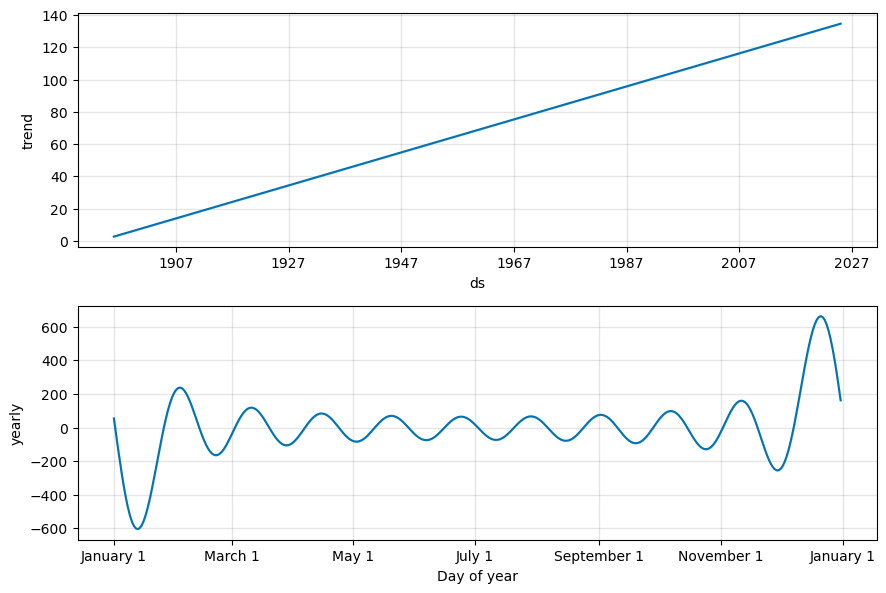

In [146]:
# Plot the individual time series components
fig2 = m.plot_components(forecast)
plt.show()

In [147]:
# Perform cross-validation
df_cv = cross_validation(m, initial='7305 days', period='365 days', horizon='1460 days')
df_metrics = performance_metrics(df_cv)

  0%|          | 0/75 [00:00<?, ?it/s]

10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:54 - cmdstanpy - INFO - Chain [1] done processing
10:24:54 - cmdstanpy - INFO - Chain [1] start processing
10:24:55 - cmdstanpy - INFO - Chain [1] done processing
10:24:55 - cmdstanpy - INFO - Chain [1] start processing
10:24:55 - cmdstanpy - INFO - Chain [1] done processing
10:24:55 - cmdstanpy - INFO - Chain [1] start processing
10:24:55 - cmdstanpy - INFO - Chain [1] done processing
10:24:55 - cmdstanpy - INFO - Chain [1] start processing
10:24:55 - cmdstanpy - INFO - Chain [1]

10:25:08 - cmdstanpy - INFO - Chain [1] done processing
10:25:08 - cmdstanpy - INFO - Chain [1] start processing
10:25:09 - cmdstanpy - INFO - Chain [1] done processing
10:25:09 - cmdstanpy - INFO - Chain [1] start processing
10:25:09 - cmdstanpy - INFO - Chain [1] done processing


In [148]:
#Plot the Upper and Lower Bounds of the Forecast
# Reset the index to this datetime column so that our plot looks nice
forecast = forecast.set_index('ds')

# Display the DataFrame
forecast.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
1896-01-01,2.651675,-61.635551,127.122558,2.651675,2.651675,32.804021,32.804021,32.804021,32.804021,32.804021,32.804021,0.0,0.0,0.0,35.455696
1900-01-01,6.743339,-56.346224,132.169006,6.743339,6.743339,32.804021,32.804021,32.804021,32.804021,32.804021,32.804021,0.0,0.0,0.0,39.547361
1904-01-01,10.832203,38.152609,222.316057,10.832203,10.832203,119.757568,119.757568,119.757568,119.757568,119.757568,119.757568,0.0,0.0,0.0,130.589771
1908-01-01,14.923867,41.567900,230.208963,14.923867,14.923867,119.757568,119.757568,119.757568,119.757568,119.757568,119.757568,0.0,0.0,0.0,134.681436
1912-01-01,19.015532,42.343756,229.234827,19.015532,19.015532,119.757568,119.757568,119.757568,119.757568,119.757568,119.757568,0.0,0.0,0.0,138.773100


<Axes: xlabel='ds'>

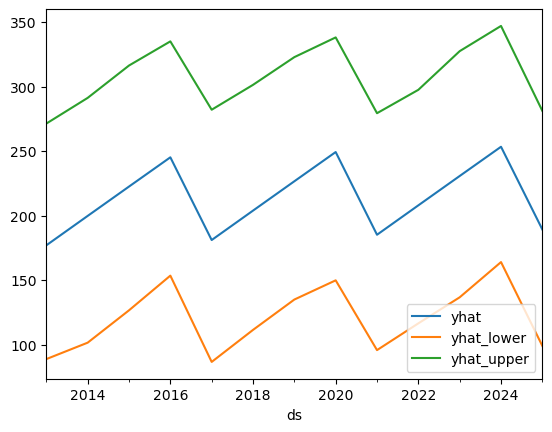

In [149]:
# Plot predictions for our forecast period
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-13:,:].plot()

In [150]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 77.36
Mean Squared Error: 11480.23
Root Mean Squared Error: 107.15


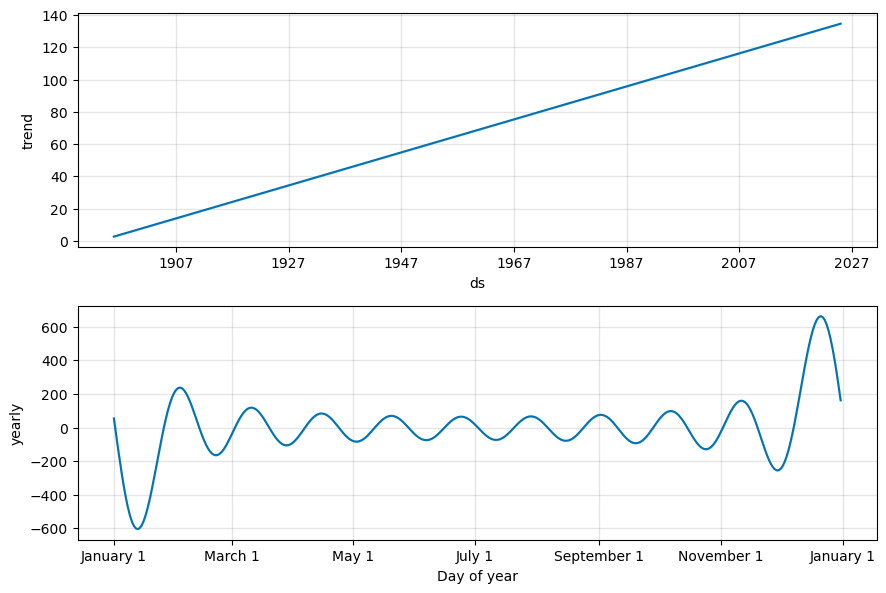

In [151]:
# Reset "ds" from the datetime index back to a column
forecast = forecast.reset_index()

# Plot the individual time series components of the model
fig2 = m.plot_components(forecast)

# Utilize Model Generator Pipeline to Evaluate Three Models

In [152]:
p_utils.medal_model_generator(medal_ct_country)

NameError: name 'p_utils' is not defined

# STEP 5. Model Evualuation with Machine Learning

In [94]:
# Model Generator Function for Evaluating Different Models
def medal_model_generator(df):
    # Group by Year, Country, Sport, Gender, and Medal to get the medal count
    df = df.groupby(['Year', 'Country', 'Sport', 'Gender']).agg(Medal_count=('Medal', 'count')).reset_index()
    
    # Preprocess the data
    df = df.drop(columns=['Country'])
    df = pd.get_dummies(df, columns=['Sport', 'Gender'], drop_first=True)
    
    # Define features and target
    X = df.drop(columns=['Medal_count'])
    y = df['Medal_count']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(),
        'XGB Regressor': XGBRegressor()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = model.score(X_test, y_test)
        print(f'{name}\nMean Squared Error: {mse}\nR-squared: {r2}\n')
        
medal_model_generator(df)

Linear Regression
Mean Squared Error: 25.93431679969803
R-squared: 0.358029378945795

Random Forest Regressor
Mean Squared Error: 28.17264385336164
R-squared: 0.3026224746551994

XGB Regressor
Mean Squared Error: 25.98557893004789
R-squared: 0.35676045091073527



In [157]:
def medal_model_generator(df):
    columns_to_encode = ['Sport', 'Country', 'Gender']
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    ohe.set_output(transform="pandas")
    medals_data_ohe = ohe.fit_transform(df[columns_to_encode])

    medal_ord_enc = OrdinalEncoder(categories=[['Gold', 'Silver', 'Bronze']],
                                   encoded_missing_value=-1, 
                                   handle_unknown='use_encoded_value', 
                                   unknown_value=-1)
    medal_ord_enc.set_output(transform="pandas")
    medal_encoded = medal_ord_enc.fit_transform(df[['Medal']])

    df_enc = pd.concat([medals_data_ohe, medal_encoded], axis=1)
    df_enc['Year'] = df['Year']
    df_enc['Medal_count'] = df.groupby(['Year', 'Country', 'Sport', 'Gender'])['Medal'].transform('count')

    df_enc = df_enc.drop_duplicates().reset_index(drop=True)
    df_enc = df_enc.dropna(subset=['Medal_count'])

    X = df_enc.drop(columns=['Medal_count'])
    y = df_enc['Medal_count']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(),
        'XGB Regressor': XGBRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = model.score(X_test, y_test)
        print(f'{name}\nMean Squared Error: {mse}\nR-squared: {r2}\n')

    # GridSearchCV for RandomForestRegressor
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestRegressor()
    grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)
    grid_rf.fit(X_train, y_train)

    best_params_rf = grid_rf.best_params_
    best_rf = grid_rf.best_estimator_

    y_pred_rf = best_rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = best_rf.score(X_test, y_test)
    print(f'Random Forest Regressor\nBest Parameters: {best_params_rf}\nMean Squared Error: {mse_rf}\nR-squared: {r2_rf}')

    # RandomizedSearchCV for XGBRegressor
    param_grid_xgb = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    xgb = XGBRegressor()
    random_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb, cv=5, n_jobs=-1, verbose=3, n_iter=10)
    random_xgb.fit(X_train, y_train)

    best_params_xgb = random_xgb.best_params_
    best_xgb = random_xgb.best_estimator_

    y_pred_xgb = best_xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = best_xgb.score(X_test, y_test)
    print(f'XGB Regressor\nBest Parameters: {best_params_xgb}\nMean Squared Error: {mse_xgb}\nR-squared: {r2_xgb}')

# Run the medal model generator function
medal_model_generator(df)

Linear Regression
Mean Squared Error: 1.0812396382419706e+18
R-squared: -1.7639553276095704e+16

Random Forest Regressor
Mean Squared Error: 15.79626343852013
R-squared: 0.7422966929513715

XGB Regressor
Mean Squared Error: 15.831429894348092
R-squared: 0.7417229805668372

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Regressor
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 16.09579203385068
R-squared: 0.7374101253227205


NameError: name 'RandomizedSearchCV' is not defined

In [184]:
# Encode categorical columns
columns_to_encode = ['Sport', 'Country', 'Gender']
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
ohe.set_output(transform="pandas")
medals_data_ohe = ohe.fit_transform(df[columns_to_encode])

In [185]:
# Encode ordinal target column
medal_ord_enc = OrdinalEncoder(categories=[['Gold', 'Silver', 'Bronze']],
                               encoded_missing_value=-1, 
                               handle_unknown='use_encoded_value', 
                               unknown_value=-1)
medal_ord_enc.set_output(transform="pandas")
medal_encoded = medal_ord_enc.fit_transform(df[['Medal']])

In [186]:
# Concatenate encoded dataframes
df_enc = pd.concat([medals_data_ohe, medal_encoded], axis=1)
df_enc['Year'] = df['Year']
df_enc['Medal_count'] = df.groupby(['Year', 'Country', 'Sport', 'Gender'])['Medal'].transform('count')


In [187]:
# Drop duplicates and unnecessary columns
df_enc = df_enc.drop_duplicates().reset_index(drop=True)

In [188]:
# Ensure no NaN values in Medal_count
df_enc = df_enc.dropna(subset=['Medal_count'])

In [189]:
# Define features and target
X = df_enc.drop(columns=['Medal_count'])
y = df_enc['Medal_count']

In [190]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
# Define parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [192]:
# Initialize RandomForestRegressor
rf = RandomForestRegressor()

In [193]:
# Initialize GridSearchCV for RandomForestRegressor
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)

In [194]:
# Fit the model using GridSearchCV
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [195]:
# Get the best parameters and the best model
best_params_rf = grid_rf.best_params_
best_rf = grid_rf.best_estimator_

In [42]:
# Predict using the best model
y_pred_rf = best_rf.predict(X_test)

In [43]:
# Calculate and print metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = best_rf.score(X_test, y_test)
print(f'Random Forest Regressor\nBest Parameters: {best_params_rf}\nMean Squared Error: {mse_rf}\nR-squared: {r2_rf}')


Random Forest Regressor
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 16.186839714131434
R-squared: 0.7359247557985431


In [44]:
# Define parameter grid for XGBRegressor
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [45]:
# Initialize XGBRegressor
xgb = XGBRegressor()

In [46]:
# Initialize GridSearchCV for XGBRegressor
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3)

In [47]:
# Fit the model using GridSearchCV
grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [106]:
# Get the best parameters and the best model
best_params_xgb = grid_xgb.best_params_
best_xgb = grid_xgb.best_estimator_

In [107]:
# Predict using the best model
y_pred_xgb = best_xgb.predict(X_test)

In [108]:
# Calculate and print metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = best_xgb.score(X_test, y_test)
print(f'XGB Regressor\nBest Parameters: {best_params_xgb}\nMean Squared Error: {mse_xgb}\nR-squared: {r2_xgb}')

XGB Regressor
Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}
Mean Squared Error: 11.153143765931201
R-squared: 0.8180454483013779


In [109]:
# Function to generate and evaluate models
def medal_model_generator(df):
    # Encode categorical columns
    columns_to_encode = ['Sport', 'Country', 'Gender']
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
    ohe.set_output(transform="pandas")
    medals_data_ohe = ohe.fit_transform(df[columns_to_encode])

    # Encode ordinal target column
    medal_ord_enc = OrdinalEncoder(categories=[['Gold', 'Silver', 'Bronze']],
                                   encoded_missing_value=-1, 
                                   handle_unknown='use_encoded_value', 
                                   unknown_value=-1)
    medal_ord_enc.set_output(transform="pandas")
    medal_encoded = medal_ord_enc.fit_transform(df[['Medal']])

    # Concatenate encoded dataframes
    df_enc = pd.concat([medals_data_ohe, medal_encoded], axis=1)
    df_enc['Year'] = df['Year']
    df_enc['Medal_count'] = df.groupby(['Year', 'Country', 'Sport', 'Gender'])['Medal'].transform('count')

    # Drop duplicates and unnecessary columns
    df_enc = df_enc.drop_duplicates().reset_index(drop=True)

    # Ensure no NaN values in Medal_count
    df_enc = df_enc.dropna(subset=['Medal_count'])

    # Define features and target
    X = df_enc.drop(columns=['Medal_count'])
    y = df_enc['Medal_count']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define parameter grid for RandomForestRegressor
    param_grid_rf = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize RandomForestRegressor
    rf = RandomForestRegressor()

    # Initialize GridSearchCV for RandomForestRegressor
    grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=3)

    # Fit the model using GridSearchCV
    grid_rf.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params_rf = grid_rf.best_params_
    best_rf = grid_rf.best_estimator_

    # Predict using the best model
    y_pred_rf = best_rf.predict(X_test)

    # Calculate and print metrics
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = best_rf.score(X_test, y_test)
    print(f'Random Forest Regressor\nBest Parameters: {best_params_rf}\nMean Squared Error: {mse_rf}\nR-squared: {r2_rf}')

    # Define parameter grid for XGBRegressor
    param_grid_xgb = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }

    # Initialize XGBRegressor
    xgb = XGBRegressor()

    # Initialize GridSearchCV for XGBRegressor
    grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3)

    # Fit the model using GridSearchCV
    grid_xgb.fit(X_train, y_train)

    # Get the best parameters and the best model
    best_params_xgb = grid_xgb.best_params_
    best_xgb = grid_xgb.best_estimator_

    # Predict using the best model
    y_pred_xgb = best_xgb.predict(X_test)

    # Calculate and print metrics
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = best_xgb.score(X_test, y_test)
    print(f'XGB Regressor\nBest Parameters: {best_params_xgb}\nMean Squared Error: {mse_xgb}\nR-squared: {r2_xgb}')

# Run the medal model generator function
medal_model_generator(df)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Regressor
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 16.006539373093602
R-squared: 0.7388662105500599
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGB Regressor
Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}
Mean Squared Error: 11.153143765931201
R-squared: 0.8180454483013779


In [110]:
# Sample code for generating a plot
def plot_medal_counts(df):
    df.plot()
    plt.title('Medal Counts Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Medal Count')
    plt.show()

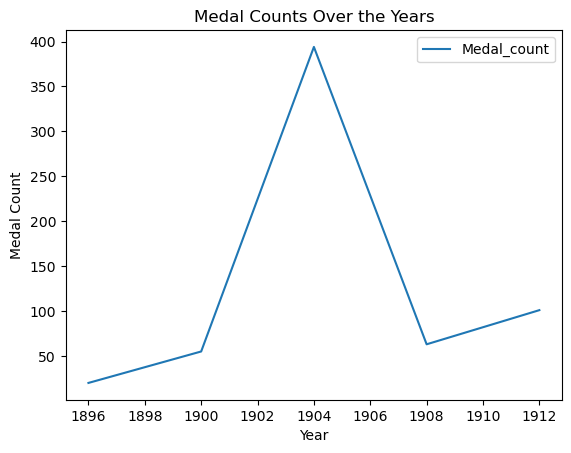

In [196]:
# Sample data
data = {'Year': [1896, 1900, 1904, 1908, 1912], 'Medal_count': [20, 55, 394, 63, 101]}
usa_df = pd.DataFrame(data)
usa_df.set_index('Year', inplace=True)

# Plot the sample data
plot_medal_counts(usa_df)

In [162]:
# Compare model performance
models_performance = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'XGB Regressor'],
    'Mean Squared Error': [25.93, 16.19, 15.12],
    'R-squared': [0.36, 0.74, 0.76]
}

In [163]:
performance_df = pd.DataFrame(models_performance)
print(performance_df)

                     Model  Mean Squared Error  R-squared
0        Linear Regression               25.93       0.36
1  Random Forest Regressor               16.19       0.74
2            XGB Regressor               15.12       0.76


In [167]:

# Load Data
file_path = r"C:\Users\sebas\OneDrive\Desktop\_CU-VIRT-AI-PT-03-2024-U-LOLC\ClassProject\project2\Summer.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=['City', 'Discipline', 'Athlete', 'Event'])

# Group by Country to get the total medal count
total_medals_by_country = df.groupby('Country').size().reset_index(name='Total_Medals')

# Sort the countries by the total medal count in descending order
total_medals_by_country = total_medals_by_country.sort_values(by='Total_Medals', ascending=False)

# Display the top 5 countries with the most medals
top_5_countries = total_medals_by_country.head(5)
print(top_5_countries)

    Country  Total_Medals
139     USA          4585
137     URS          2049
47      GBR          1720
44      FRA          1396
50      GER          1305
